<a href="https://colab.research.google.com/github/shubhanshu1995/Deep-Learning-with-Keras/blob/master/MNIST_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Handwritten Digits Classification using Keras, Tensorflow & Python**

In [0]:
import tensorflow as tf
from keras import datasets

In [0]:
mnist = datasets.mnist  # 28x28 grayscale images of hand-written digits 0-9

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [16]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = X_test.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ")")
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000
Height/Width of each image: num_px = 28
Each image is of size: (28, 28)
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


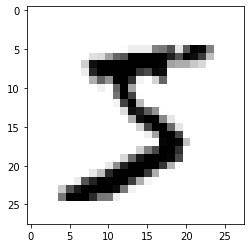

In [27]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = plt.cm.binary)

###**One common preprocessing step in machine learning is to center and normalize your dataset, meaning that you substract the minimum of the whole numpy array from each example, and then divide each example by the difference of maximum & minimum of the whole numpy array. So for picture datasets, we'll just divide every row of the dataset by 255 (the maximum value of a pixel channel).**

###**Normalization rescales the values into a range of [0,1]**

###**Let's normalize our dataset using Keras utility.**

In [0]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

# **Model Architecture**

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Training**

In [54]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2597 - acc: 0.9235
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1044 - acc: 0.9674
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0705 - acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0515 - acc: 0.9832
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0414 - acc: 0.9866
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0313 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0257 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0201 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0185 - acc: 0.9935
Epoch 10/10
60000/60000 [==============================] - 

# **Validation Loss & Validation Accuracy**

In [56]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation Loss: {}\nValidation Accuracy: {}".format(val_loss, val_acc))

10000/10000 [==============================] - 0s 38us/sample - loss: 0.1170 - acc: 0.9719
Validation Loss: 0.11700121415155372
Validation Accuracy: 0.9718999862670898


# **Saving a model**

In [0]:
model.save("Awesome_Digits_Reader.model")

# **Loading a saved model**

In [0]:
new_model = tf.keras.models.load_model("Awesome_Digits_Reader.model")

# **Prediction on the test set**

In [0]:
predictions = new_model.predict([X_test])

In [61]:
print(predictions.shape)

(10000, 10)


In [62]:
print(predictions)

[[9.97173698e-13 6.08796402e-10 4.52770432e-10 ... 9.99990940e-01
  1.19643895e-09 1.02946540e-08]
 [7.20599714e-17 4.58286920e-08 1.00000000e+00 ... 1.21810832e-13
  1.99163320e-12 2.35969501e-22]
 [7.25714356e-13 9.99994397e-01 6.02510255e-08 ... 5.49036758e-06
  5.43972938e-08 1.29995225e-11]
 ...
 [8.49932917e-14 8.59324167e-09 1.39485388e-14 ... 2.14296776e-07
  3.73080322e-09 1.10020505e-06]
 [2.47148569e-12 4.48864427e-12 1.25481578e-14 ... 1.90030075e-11
  1.49320374e-06 6.80065216e-13]
 [1.78236833e-13 4.74268801e-12 1.18529437e-14 ... 5.56860212e-15
  1.48006685e-09 1.34926532e-12]]


In [69]:
import numpy as np

print(np.argmax(predictions[4])) 

4


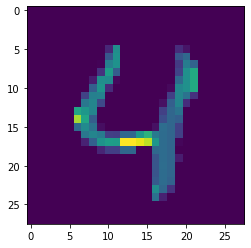

In [70]:
plt.imshow(X_test[4])
plt.show()